In [1]:
from GEMCSCTriggerPrimitivesAnalyzer import *

# Read root file

In [3]:
df = read_root_file("data/out_GEMCSCTriggerPrimitivesReader.root")
ALCT_df = df['GEMCSCTriggerPrimitivesReader/ALCT_tree;1']
CLCT_df = df['GEMCSCTriggerPrimitivesReader/CLCT_tree;1']
LCT_df = df['GEMCSCTriggerPrimitivesReader/LCT_tree;1']

# Match LCTs
Select parameters for which you want exact match and for which you want loosen match.
Match columns should contain all matching parameters (exact and loosen one).
Loose_matching should contain only loosen parameters.
This step adds column "match" to dataframe. Match = 0 to unmatched LCTs, >0 for matched. Each mutch number corresponds to one data/emulator matched pair.

In [4]:
match_columns = ['endcap', 'station', 'ring', 'chamber', 'quality', 'keyWG', 'strip', 'quadStrip', 'eightStrip', 'stripType', 'bend', 'slope', 'pattern', 'run3pattern']
loose_matching = {'eightStrip': 3}
LCTs_df_matched = match_LCTs(LCT_df, match_columns, loose_matching)

You can filter dataframe if you want to look at specific endcap, station, ring, chamber.

In [6]:
LCTs_df_matched_filtered = filter_chamber(LCTs_df_matched, 1, 1, 1)
display(LCTs_df_matched_filtered)

,index,entry,subentry,RUN,eventsAnalyzed,is_data,is_emul,endcap,station,ring,...,strip,quadStrip,eightStrip,stripType,bend,slope,bx,pattern,run3pattern,match
0,0,0,0,370293,1,True,False,1,1,1,...,78,157,315,0,0,15,0,2,0,1
1,1,0,1,370293,1,True,False,1,1,1,...,160,321,642,1,0,2,0,10,4,2
2,2,0,2,370293,1,True,False,1,1,1,...,211,422,845,0,0,10,0,4,0,3
13,13,1,0,370293,1,False,True,1,1,1,...,78,157,315,0,0,15,8,2,0,1
14,14,1,1,370293,1,False,True,1,1,1,...,160,321,642,1,0,2,10,10,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,18921,1354,1,370293,678,True,False,1,1,1,...,144,289,578,0,0,15,0,2,0,8050
18922,18922,1354,2,370293,678,True,False,1,1,1,...,77,155,311,1,1,0,0,10,4,8051
18946,18946,1355,0,370293,678,False,True,1,1,1,...,183,366,733,1,0,5,7,8,2,8049
18947,18947,1355,1,370293,678,False,True,1,1,1,...,144,289,578,0,0,15,7,2,0,8050


# Plotting

## Plot one parameter
To compare total amounts of specific LCT parameter between data and emulator use this:

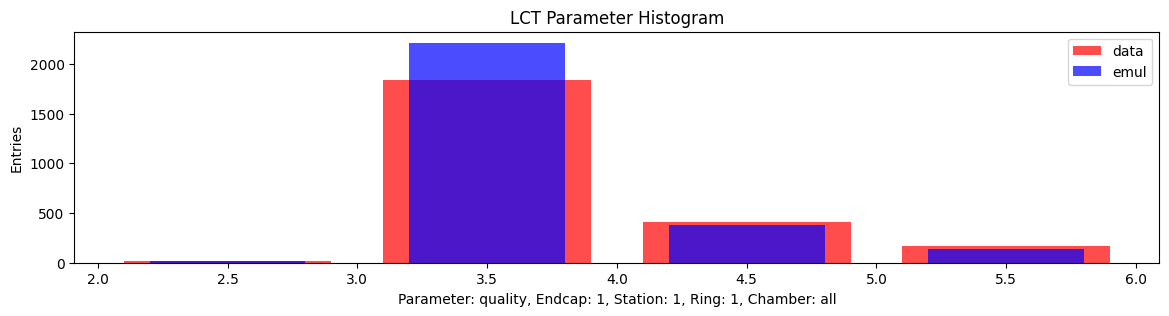

In [10]:
plot_LCT_parameter_histogram(LCTs_df_matched_filtered, 'quality', endcap=1, station=1, ring=1, chamber="all")

## Check how many LCTs are matched

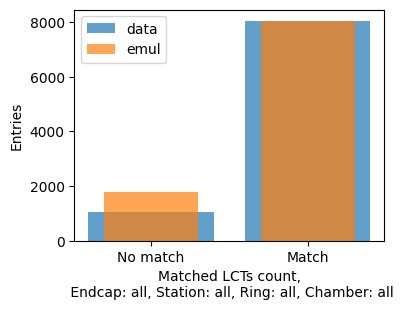

In [11]:
plot_matched_LCT_count(LCTs_df_matched)

## Plot matching heatmap

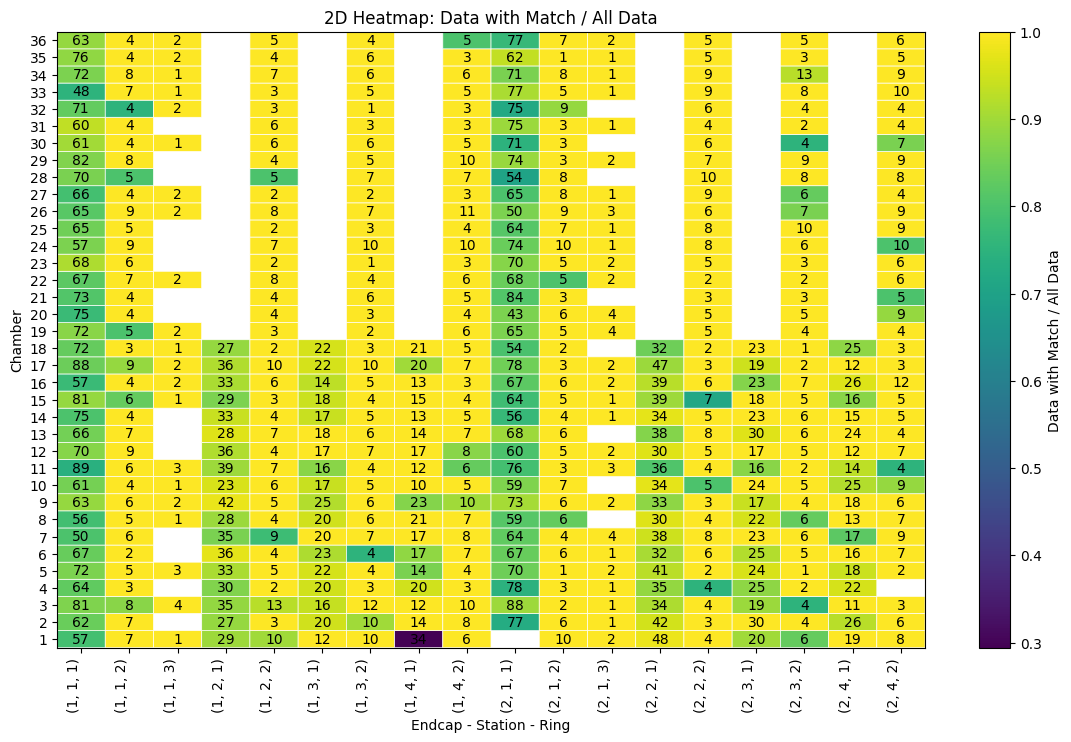

In [12]:
plot_heatmap_with_event_counts(LCTs_df_matched)